# LIFE EXPECTANCY AND GDP DATA ANALYSIS

Starting off by importing all the necessary libraries (Pandas, Matplotlib, Seaborn, Numpy, Plotly) and creating a dataframe from the given CSV file using Pandas

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

df = pd.read_csv('all_data.csv')

Lets take a peek at what the dataframe has to offer by printing the first 50 rows...

In [2]:
df.head(20)

Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014                              80.3  2.609900e+11
15   Chile  2015                              80.5  2.425180e+11
16   China  2000                              71.7  1.211350e+12
17   China  2001                              72.2  1.339400e+12
18   China  2002                              72.7  1.470550e+12
19   China  2003                              73.1  1.660290e+12

## Life Expectancy Of Different Countries

Now that we know the categorical & numerical variables, Lets start off with the visual analysis..
Starting with the analysis of different countries over the years..

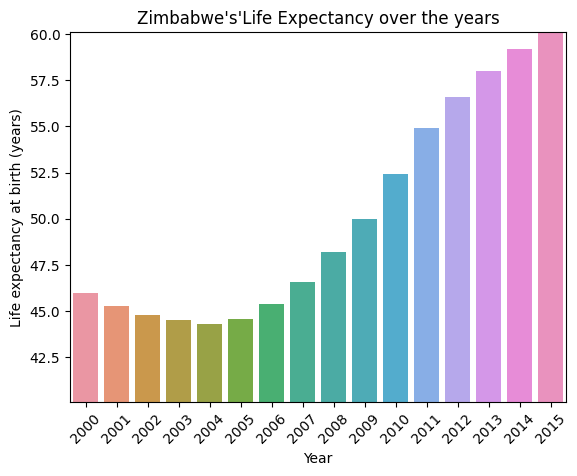

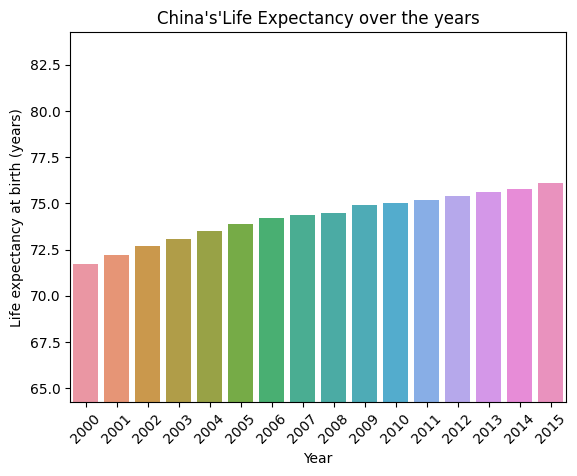

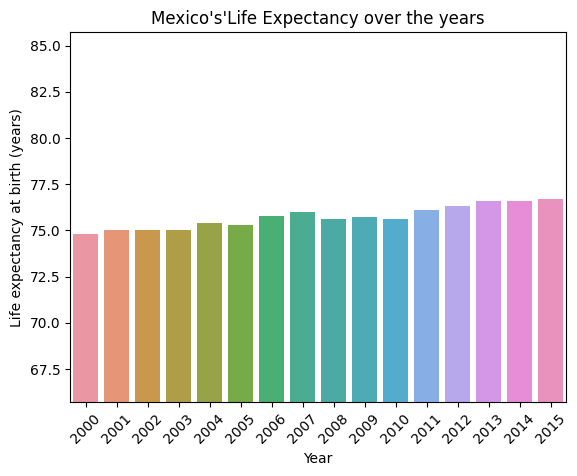

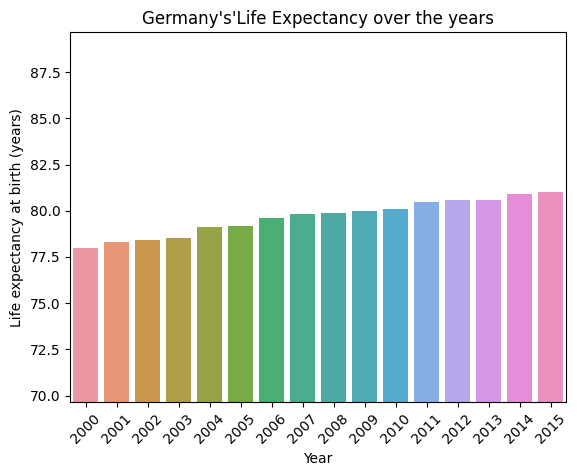

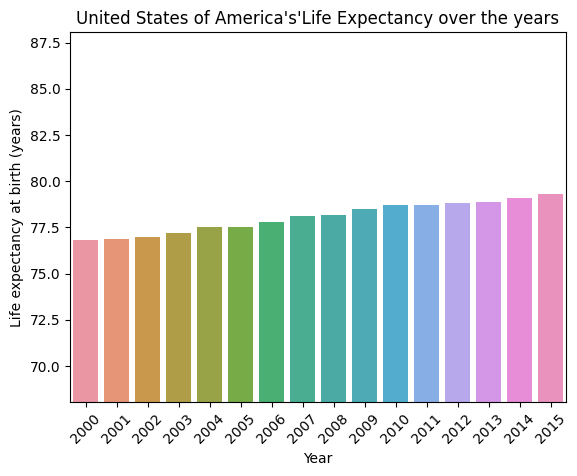

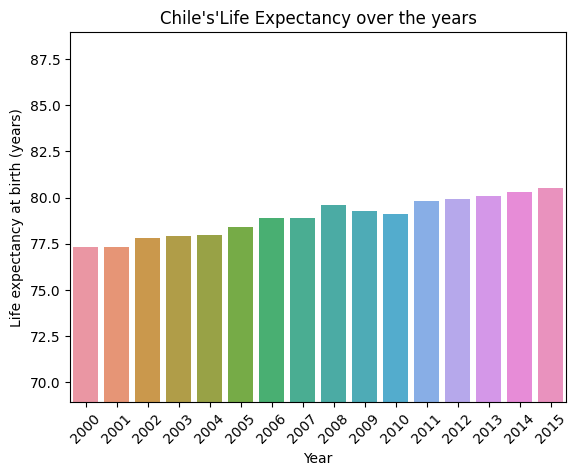

In [3]:
countries = list(set(df['Country'].tolist()))
for country in countries:
    temp = df[df['Country'] == country]
    plt.title(f"{country}'s'Life Expectancy over the years")
    ax = sns.barplot(x = 'Year', y = 'Life expectancy at birth (years)', data = temp)
    mean_life = temp['Life expectancy at birth (years)'].mean()
    ax.set_ylim(mean_life - 10,mean_life + 10)  
    plt.xticks(rotation = 45)
    plt.show()
    

Report: Most of the countries in the dataset tend to have an increasing life expectancy over the years. Out of all the countries Zimbabwe's life expectancy growth appears to be a lot more  exponential, considering the difference between the lowest and the highest datapoint is the most in Zimbabwe's distribution..

### Combined line graphs for better comparison


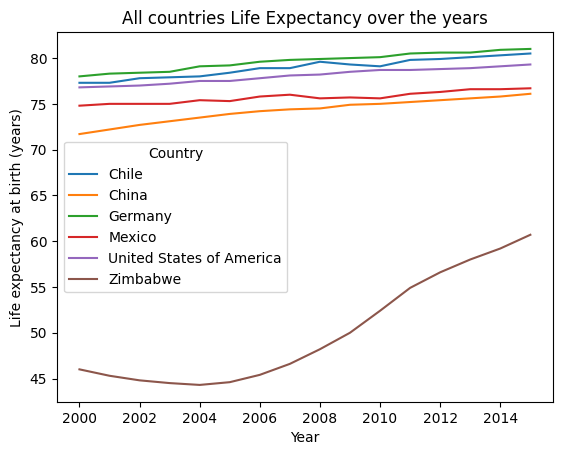

In [4]:
plt.title("All countries Life Expectancy over the years")
ax = sns.lineplot(x = 'Year', y = 'Life expectancy at birth (years)', hue = 'Country', data = df)

Now its easier to compare different countries' trajectories over the years in the life expectancy aspect. Zimbabwe shows an extensive growth in it's life expectancy in comparison to other countries.. 

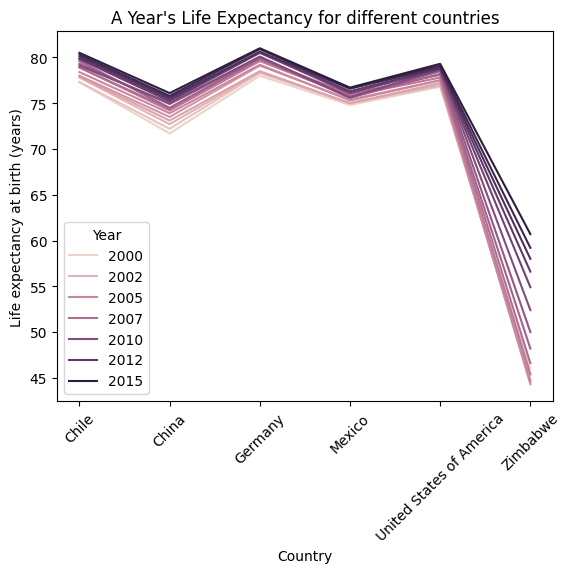

In [5]:
plt.title("A Year's Life Expectancy for different countries")
ax = sns.lineplot(x = 'Country', y = 'Life expectancy at birth (years)', hue = 'Year', data = df)
plt.xticks(rotation = 45)
plt.show()

## GDP Variation Of Different Counties Over The Years 

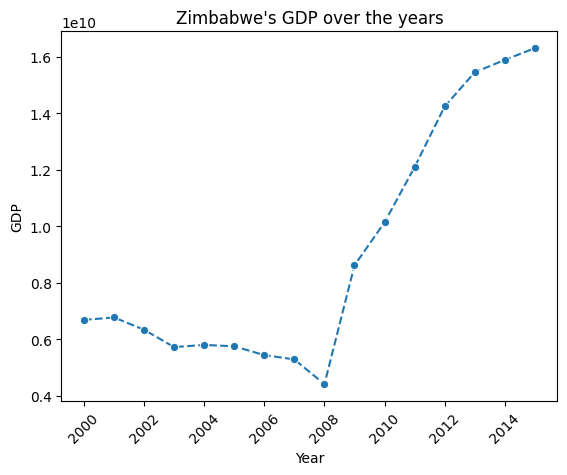

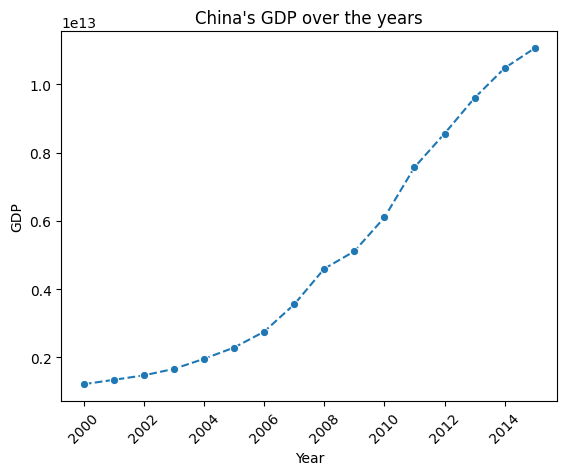

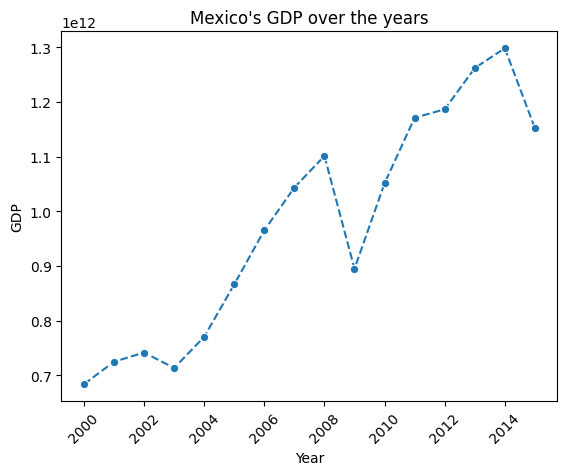

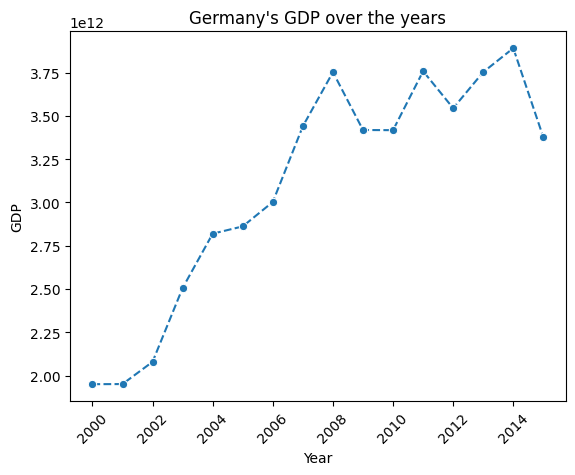

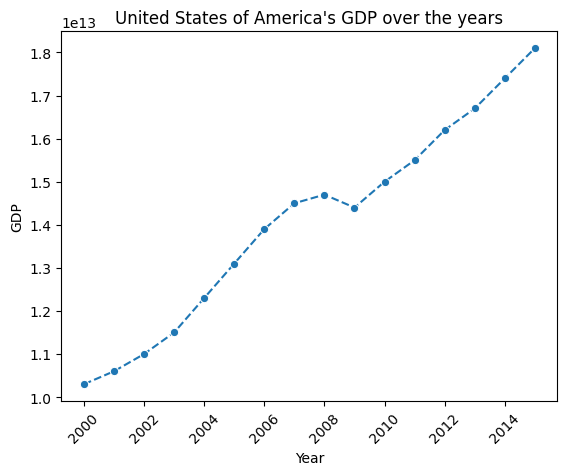

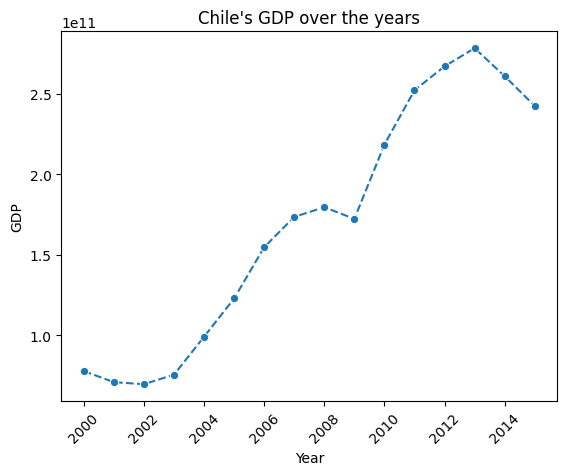

In [6]:
for country in countries:
    temp = df[df['Country'] == country]
    plt.title(f"{country}'s GDP over the years")
    ax = sns.lineplot(x = 'Year', y = 'GDP', data = temp,linestyle = '--', marker ='o')
    plt.xticks(rotation = 45)
    plt.show()

Report: 
Chile:
Chile experienced steady economic growth from 2000 to 2015, with GDP increasing consistently each year.

China:
China exhibited remarkable economic growth during this period, with GDP increasing significantly each year.

Germany:
Germany's GDP showed a generally upward trend, with slight fluctuations in some years.

Mexico:
Mexico's GDP demonstrated moderate growth, with fluctuations in some years.

United States of America:
The United States experienced steady GDP growth, with slight fluctuations in some years.

Zimbabwe:
Zimbabwe's GDP trend was unstable, with periods of both growth and decline, reflecting the country's economic challenges.

These charts provide a visual representation of the GDP trends for each country over the specified period. They illustrate the varying economic landscapes and growth patterns across different nations.

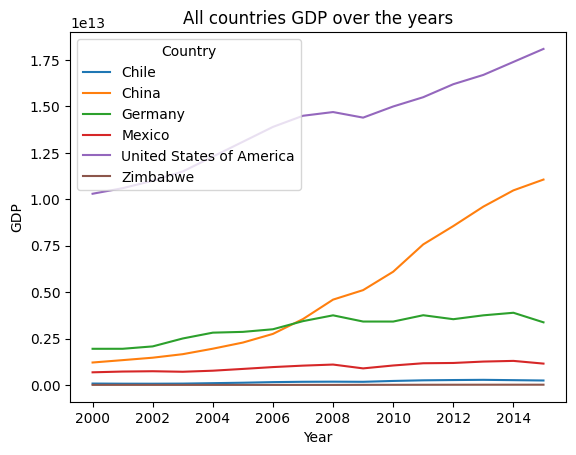

In [7]:
plt.title("All countries GDP over the years")
ax = sns.lineplot(x = 'Year', y = 'GDP',hue = 'Country', data = df)


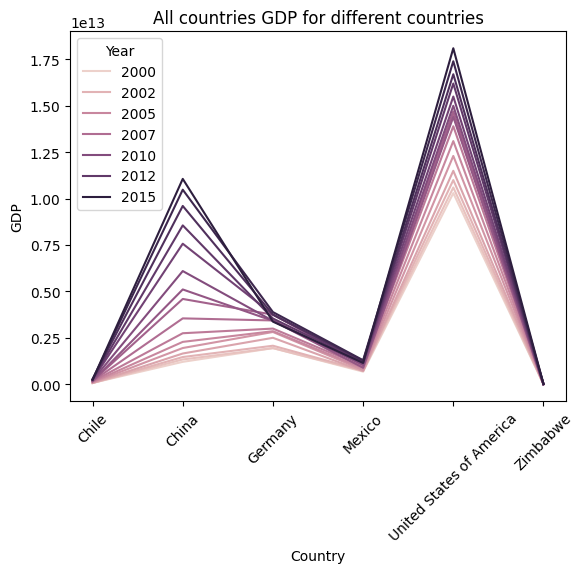

In [8]:
plt.title("All countries GDP for different countries")
ax = sns.lineplot(x = 'Country', y = 'GDP', hue = 'Year', data = df)
plt.xticks(rotation = 45)
plt.show()

The above two graphs make it easier to compare thr trajectory of GDP with respect to contries and the time(year)..

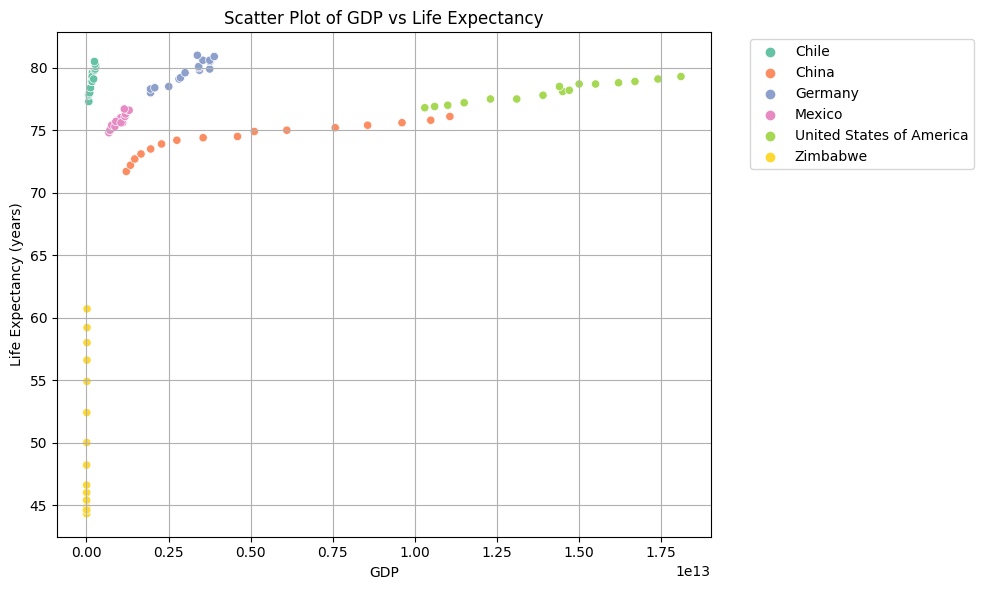

Correlation coefficient between GDP and life expectancy: 0.3432067484491559


In [9]:
correlation = df['GDP'].corr(df['Life expectancy at birth (years)'])

# Visualize the relationship between GDP and life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP', y='Life expectancy at birth (years)', hue='Country', palette='Set2')
plt.title('Scatter Plot of GDP vs Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy (years)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Correlation coefficient between GDP and life expectancy: {correlation}")

Report: As we can see the correlation coefficient between GDP and Life Expectancy is 0.343 which is closer to 0 than to 1, which suggests that there is only a little positive correlation between GDP and Life Expectancy... Therefore the economic growth has slightly influenced countries' Life Expectancy mainly due to investent in health sectors..

## Checking For Outliers

Boxplot makes it efficient to identify outliers in a dataset.

### Boxplot for GDP vs Country

In [10]:
# ax = sns.boxplot(x = 'Country', y = 'GDP', data = df)
# plt.title("To identify outliers in GDP")
# plt.xticks(rotation = 45)
# plt.show()
fig = px.box(df,x = 'Country', y = 'GDP', points = 'all', color = 'Country')
fig.show()

### Boxplot for Life expectancy at birth (years) vs Country

In [11]:
# ax = sns.boxplot(x = 'Country', y = 'Life expectancy at birth (years)', data = df)
# plt.title("To identify outliers in GDP")
# plt.xticks(rotation = 45)
# plt.show()
fig = px.box(df,x = 'Country', y = 'Life expectancy at birth (years)', points = 'all', color = 'Country')
fig.show()

The above boxplots portray that there are no outliers in the dataset for any country...
But lets make sure by calculating the number of outliers using python..


In [12]:
#Calculating Outliers with statistical method
for country in countries:
    temp = df[df['Country'] == country]
    Q1 = temp['GDP'].quantile(0.25)
    Q3 = temp['GDP'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = temp[(temp['GDP'] < lower_bound) | (temp['GDP'] > upper_bound)]

    
    if not outliers.empty:
        print(f"Outliers in the GDP of {country}: {outliers}")
    else:
        print(f"No outliers in the GDP of {country}")
    


No outliers in the GDP of Zimbabwe
No outliers in the GDP of China
No outliers in the GDP of Mexico
No outliers in the GDP of Germany
No outliers in the GDP of United States of America
No outliers in the GDP of Chile


In [13]:
for country in countries:
    temp = df[df['Country'] == country]
    Q1 = temp['Life expectancy at birth (years)'].quantile(0.25)
    Q3 = temp['Life expectancy at birth (years)'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = temp[(temp['Life expectancy at birth (years)'] < lower_bound) | (temp['Life expectancy at birth (years)'] > upper_bound)]

    if not outliers.empty:
        print(f"Outliers in the  Life expectancy of {country}: {outliers}")
    else:
        print(f"No outliers in the Life expectancy of {country}")

No outliers in the Life expectancy of Zimbabwe
No outliers in the Life expectancy of China
No outliers in the Life expectancy of Mexico
No outliers in the Life expectancy of Germany
No outliers in the Life expectancy of United States of America
No outliers in the Life expectancy of Chile


As we can see, it is pretty evident that there are no outlier in any of the above data

## Data Manipulation

### Pivoting the tables for a better view at the data 

In [14]:
peryear_gdp = df.pivot(index="Country", columns="Year", values="GDP")
peryear_gdp.head(10)
#Dataframe converted into GDP only

Year                              2000          2001          2002  \
Country                                                              
Chile                     7.786093e+10  7.097992e+10  6.973681e+10   
China                     1.211350e+12  1.339400e+12  1.470550e+12   
Germany                   1.949950e+12  1.950650e+12  2.079140e+12   
Mexico                    6.836480e+11  7.247040e+11  7.415600e+11   
United States of America  1.030000e+13  1.060000e+13  1.100000e+13   
Zimbabwe                  6.689958e+09  6.777385e+09  6.342116e+09   

Year                              2003          2004          2005  \
Country                                                              
Chile                     7.564346e+10  9.921039e+10  1.229650e+11   
China                     1.660290e+12  1.955350e+12  2.285970e+12   
Germany                   2.505730e+12  2.819250e+12  2.861410e+12   
Mexico                    7.132840e+11  7.702680e+11  8.663460e+11   
United States of America  1.150000e+13  1.230000e+13  1.310000e+13   
Zimbabwe                  5.727592e+09  5.805598e+09  5.755215e+09   

Year                              2006          2007          2008  \
Country                                                              
Chile                     1.547880e+11  1.736060e+11  1.796380e+11   
China                     2.752130e+12  3.552180e+12  4.598210e+12   
Germany                   3.002450e+12  3.439950e+12  3.752370e+12   
Mexico                    9.652810e+11  1.043470e+12  1.101280e+12   
United States of America  1.390000e+13  1.450000e+13  1.470000e+13   
Zimbabwe                  5.443896e+09  5.291950e+09  4.415703e+09   

Year                              2009          2010          2011  \
Country                                                              
Chile                     1.723890e+11  2.185380e+11  2.522520e+11   
China                     5.109950e+12  6.100620e+12  7.572550e+12   
Germany                   3.418010e+12  3.417090e+12  3.757700e+12   
Mexico                    8.949490e+11  1.051130e+12  1.171190e+12   
United States of America  1.440000e+13  1.500000e+13  1.550000e+13   
Zimbabwe                  8.621574e+09  1.014186e+10  1.209845e+10   

Year                              2012          2013          2014  \
Country                                                              
Chile                     2.671220e+11  2.783840e+11  2.609900e+11   
China                     8.560550e+12  9.607220e+12  1.048240e+13   
Germany                   3.543980e+12  3.752510e+12  3.890610e+12   
Mexico                    1.186600e+12  1.261980e+12  1.298460e+12   
United States of America  1.620000e+13  1.670000e+13  1.740000e+13   
Zimbabwe                  1.424249e+10  1.545177e+10  1.589105e+10   

Year                              2015  
Country                                 
Chile                     2.425180e+11  
China                     1.106470e+13  
Germany                   3.375610e+12  
Mexico                    1.152260e+12  
United States of America  1.810000e+13  
Zimbabwe                  1.630467e+10

In [15]:
#sns.heatmap(peryear_gdp,cbar_kws = {"label": "GDP"})
fig = px.imshow(peryear_gdp)
fig.show()

In [16]:
peryear_life = df.pivot(index="Year", columns="Country", values="Life expectancy at birth (years)")
peryear_life.head(10)
#Dataframe converted into Life Expectancy only...

Country  Chile  China  Germany  Mexico  United States of America  Zimbabwe
Year                                                                      
2000      77.3   71.7     78.0    74.8                      76.8      46.0
2001      77.3   72.2     78.3    75.0                      76.9      45.3
2002      77.8   72.7     78.4    75.0                      77.0      44.8
2003      77.9   73.1     78.5    75.0                      77.2      44.5
2004      78.0   73.5     79.1    75.4                      77.5      44.3
2005      78.4   73.9     79.2    75.3                      77.5      44.6
2006      78.9   74.2     79.6    75.8                      77.8      45.4
2007      78.9   74.4     79.8    76.0                      78.1      46.6
2008      79.6   74.5     79.9    75.6                      78.2      48.2
2009      79.3   74.9     80.0    75.7                      78.5      50.0

In [17]:
fig = px.imshow(peryear_life)
fig.show()

## Multivariate Analysis

To visualize the relation between 3 variables 

In [18]:

fig = px.scatter_3d(df, x='Year', y='Life expectancy at birth (years)', z='GDP', color='Country')
fig.show()

The above graph shows the relation between GDP, Life Expectancy and Year.

In [19]:

fig = px.scatter_3d(df, x='Country', y='Life expectancy at birth (years)', z='GDP', color='Year')
fig.show()


The above graph shows the relation between GDP, Life Expectancy and Country.

# THANK YOU VERY MUCH